In [1]:
past_days = 7
future_days = 1
n_lags = int(96*past_days)
horizon = int(96*future_days)

In [2]:
import pandas as pd

In [3]:
utility_data=pd.read_csv('weatherkit_plus_load.csv')

In [4]:
utility_data.event_timestamp = utility_data.event_timestamp.apply(pd.to_datetime)

In [5]:
utility_data.head()

,event_timestamp,weatherkit_observed_temperature_C,weatherkit_observed_humidity_pc,weatherkit_observed_air_pressure_kPa,weatherkit_observed_cloud_cover_pc,weatherkit_observed_wind_direction_deg,weatherkit_observed_wind_speed_km_h,weatherkit_forecast_temp_C,weatherkit_forecast_humidity_pc,weatherkit_forecast_air_pressure_kPa,weatherkit_forecast_cloud_cover_pc,weatherkit_forecast_wind_direction_deg,weatherkit_forecast_wind_speed_km_h,load_MW
0,2023-02-11 00:30:00+05:30,22.21,70.0,101.357,0.0,359.0,7.19,21.99,72.0,101.369,0.0,1.0,7.06,256.024088
1,2023-02-11 00:45:00+05:30,22.25,69.0,101.354,0.0,2.0,7.25,21.99,72.0,101.369,0.0,1.0,7.06,251.899132
2,2023-02-11 01:00:00+05:30,22.10,70.0,101.344,0.0,4.0,7.21,21.99,72.0,101.369,0.0,1.0,7.06,248.695780
3,2023-02-11 01:15:00+05:30,21.95,70.0,101.333,0.0,6.0,7.15,21.99,72.0,101.369,0.0,1.0,7.06,245.879308
4,2023-02-11 01:30:00+05:30,21.80,70.0,101.322,0.0,8.0,7.09,21.35,73.0,101.334,0.0,6.0,7.37,243.583376


In [6]:
utility_data.event_timestamp[:10]

0   2023-02-11 00:30:00+05:30
1   2023-02-11 00:45:00+05:30
2   2023-02-11 01:00:00+05:30
3   2023-02-11 01:15:00+05:30
4   2023-02-11 01:30:00+05:30
5   2023-02-11 01:45:00+05:30
6   2023-02-11 02:00:00+05:30
7   2023-02-11 02:15:00+05:30
8   2023-02-11 02:30:00+05:30
9   2023-02-11 02:45:00+05:30
Name: event_timestamp, dtype: datetime64[ns, pytz.FixedOffset(330)]

In [7]:
utility_data.event_timestamp.max()

Timestamp('2023-07-10 17:00:00+0530', tz='pytz.FixedOffset(330)')

In [8]:
utility_data['ts_month_of_year'] = utility_data.event_timestamp.apply(lambda x : x.month)

In [9]:
utility_data['ts_day_of_month'] = utility_data.event_timestamp.apply(lambda x : x.day)

In [10]:
utility_data['ts_day_of_week'] = utility_data.event_timestamp.apply(lambda x : x.dayofweek)

In [11]:
utility_data['ts_hour_of_day'] = utility_data.event_timestamp.apply(lambda x : x.hour)

In [12]:
utility_data['ts_minute_of_hour'] = utility_data.event_timestamp.apply(lambda x : x.minute)

In [13]:
utility_data.head()

,event_timestamp,weatherkit_observed_temperature_C,weatherkit_observed_humidity_pc,weatherkit_observed_air_pressure_kPa,weatherkit_observed_cloud_cover_pc,weatherkit_observed_wind_direction_deg,weatherkit_observed_wind_speed_km_h,weatherkit_forecast_temp_C,weatherkit_forecast_humidity_pc,weatherkit_forecast_air_pressure_kPa,weatherkit_forecast_cloud_cover_pc,weatherkit_forecast_wind_direction_deg,weatherkit_forecast_wind_speed_km_h,load_MW,ts_month_of_year,ts_day_of_month,ts_day_of_week,ts_hour_of_day,ts_minute_of_hour
0,2023-02-11 00:30:00+05:30,22.21,70.0,101.357,0.0,359.0,7.19,21.99,72.0,101.369,0.0,1.0,7.06,256.024088,2,11,5,0,30
1,2023-02-11 00:45:00+05:30,22.25,69.0,101.354,0.0,2.0,7.25,21.99,72.0,101.369,0.0,1.0,7.06,251.899132,2,11,5,0,45
2,2023-02-11 01:00:00+05:30,22.10,70.0,101.344,0.0,4.0,7.21,21.99,72.0,101.369,0.0,1.0,7.06,248.695780,2,11,5,1,0
3,2023-02-11 01:15:00+05:30,21.95,70.0,101.333,0.0,6.0,7.15,21.99,72.0,101.369,0.0,1.0,7.06,245.879308,2,11,5,1,15
4,2023-02-11 01:30:00+05:30,21.80,70.0,101.322,0.0,8.0,7.09,21.35,73.0,101.334,0.0,6.0,7.37,243.583376,2,11,5,1,30


In [14]:
target_var = 'load_MW'

In [15]:
predictor_variables = [col for col in utility_data.columns if col not in ['event_timestamp',target_var]]
predictor_variables

['weatherkit_observed_temperature_C',
 'weatherkit_observed_humidity_pc',
 'weatherkit_observed_air_pressure_kPa',
 'weatherkit_observed_cloud_cover_pc',
 'weatherkit_observed_wind_direction_deg',
 'weatherkit_observed_wind_speed_km_h',
 'weatherkit_forecast_temp_C',
 'weatherkit_forecast_humidity_pc',
 'weatherkit_forecast_air_pressure_kPa',
 'weatherkit_forecast_cloud_cover_pc',
 'weatherkit_forecast_wind_direction_deg',
 'weatherkit_forecast_wind_speed_km_h',
 'ts_month_of_year',
 'ts_day_of_month',
 'ts_day_of_week',
 'ts_hour_of_day',
 'ts_minute_of_hour']

In [16]:
observed_vars = [col for col in predictor_variables if 'observed' in col]
observed_vars

['weatherkit_observed_temperature_C',
 'weatherkit_observed_humidity_pc',
 'weatherkit_observed_air_pressure_kPa',
 'weatherkit_observed_cloud_cover_pc',
 'weatherkit_observed_wind_direction_deg',
 'weatherkit_observed_wind_speed_km_h']

In [17]:
forecast_vars = [col for col in predictor_variables if 'forecast' in col] # or 'ts_' in col)]
forecast_vars

['weatherkit_forecast_temp_C',
 'weatherkit_forecast_humidity_pc',
 'weatherkit_forecast_air_pressure_kPa',
 'weatherkit_forecast_cloud_cover_pc',
 'weatherkit_forecast_wind_direction_deg',
 'weatherkit_forecast_wind_speed_km_h']

In [18]:
ts_vars = [col for col in predictor_variables if 'ts_' in col]
ts_vars

['ts_month_of_year',
 'ts_day_of_month',
 'ts_day_of_week',
 'ts_hour_of_day',
 'ts_minute_of_hour']

In [19]:
import matplotlib.pyplot as plt
import numpy as np

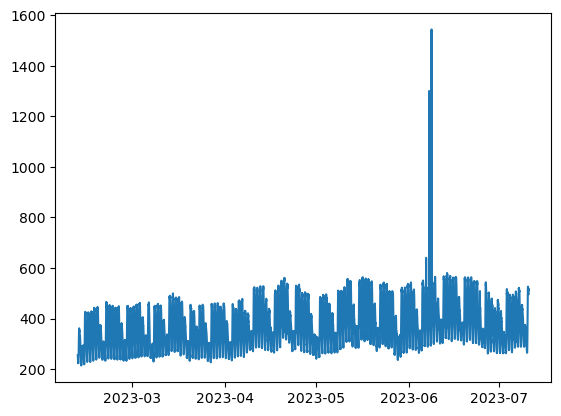

In [20]:
x = utility_data.event_timestamp
y = utility_data.load_MW
plt.plot(x,y)
plt.show()

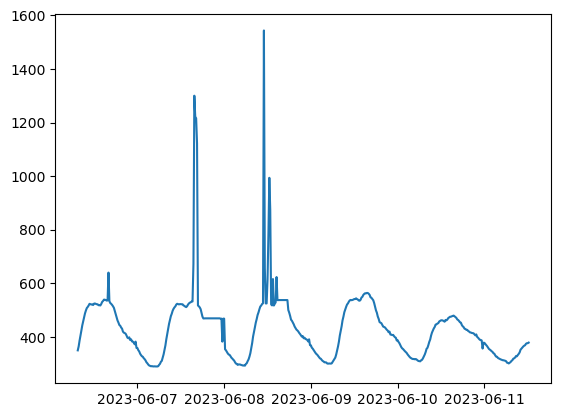

In [21]:
x = utility_data.event_timestamp[11000:11500]
y = utility_data.load_MW[11000:11500]
plt.plot(x,y)
plt.show()

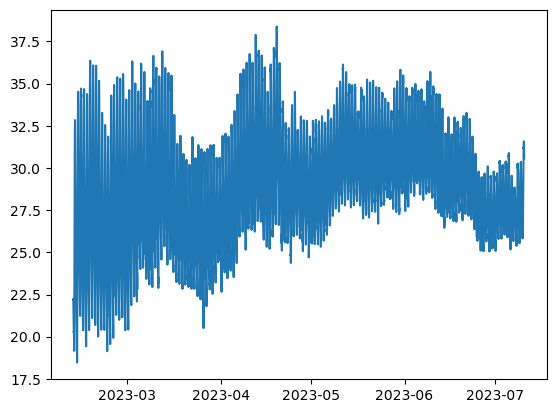

In [22]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_observed_temperature_C
plt.plot(x,y)
plt.show()

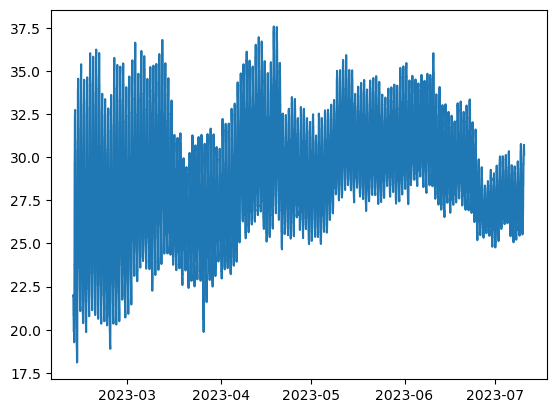

In [23]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_forecast_temp_C
plt.plot(x,y)
plt.show()

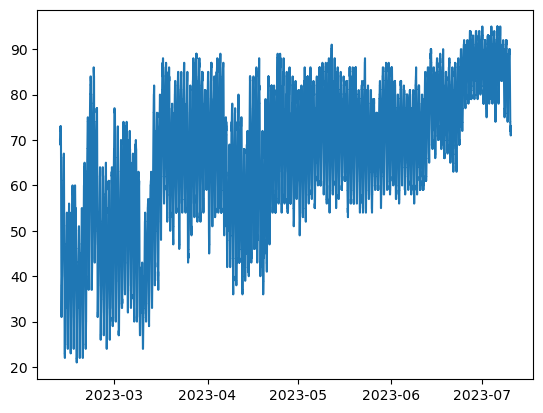

In [24]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_observed_humidity_pc
plt.plot(x,y)
plt.show()

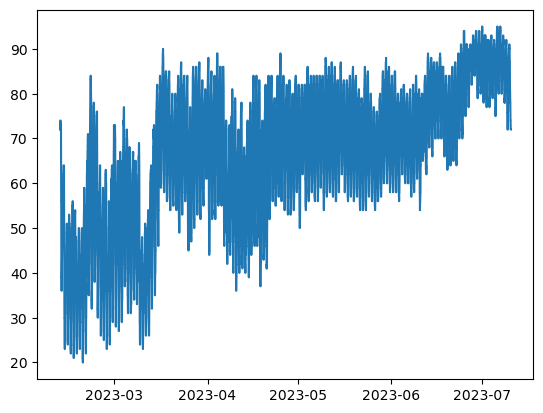

In [25]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_forecast_humidity_pc
plt.plot(x,y)
plt.show()

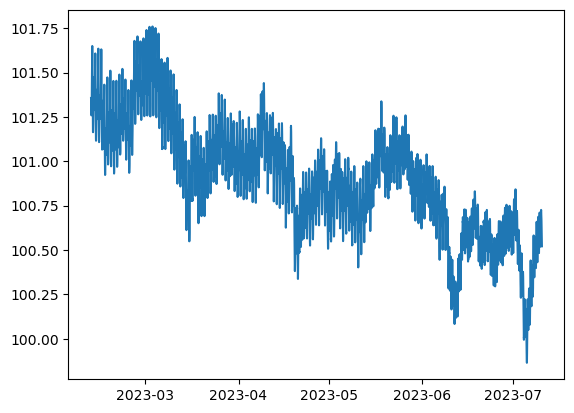

In [26]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_observed_air_pressure_kPa
plt.plot(x,y)
plt.show()

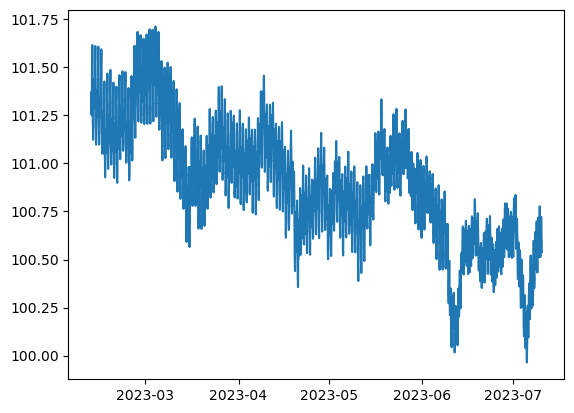

In [27]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_forecast_air_pressure_kPa
plt.plot(x,y)
plt.show()

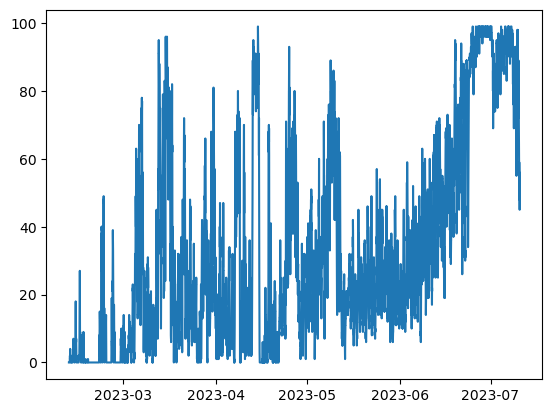

In [28]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_observed_cloud_cover_pc
plt.plot(x,y)
plt.show()

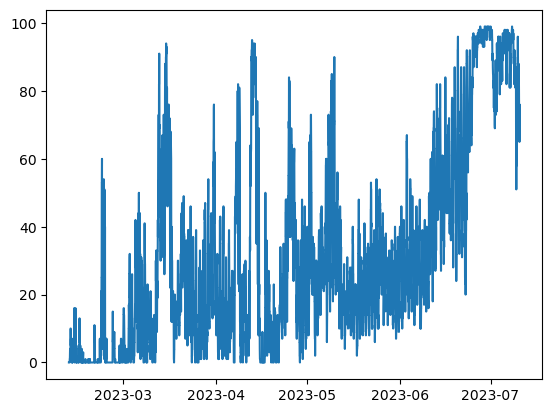

In [29]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_forecast_cloud_cover_pc
plt.plot(x,y)
plt.show()

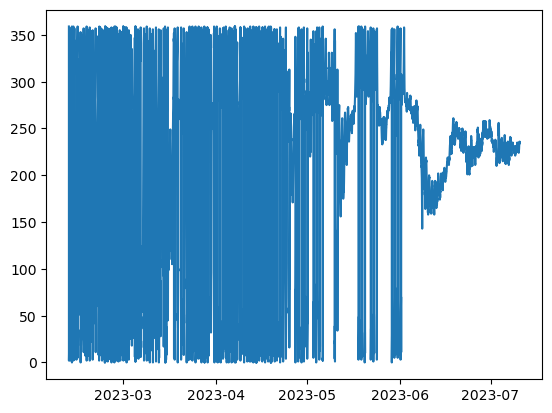

In [30]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_observed_wind_direction_deg
plt.plot(x,y)
plt.show()

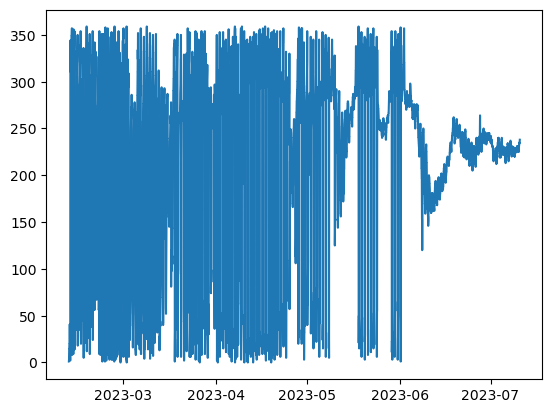

In [31]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_forecast_wind_direction_deg
plt.plot(x,y)
plt.show()

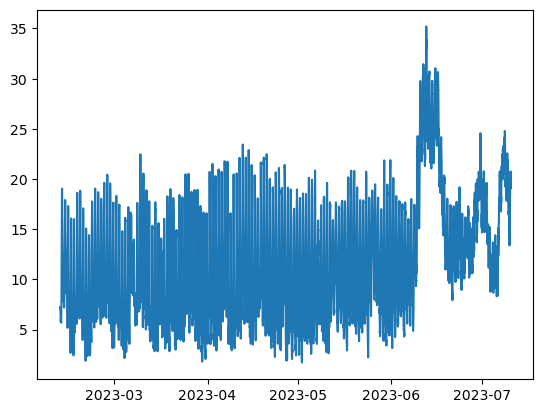

In [32]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_observed_wind_speed_km_h
plt.plot(x,y)
plt.show()

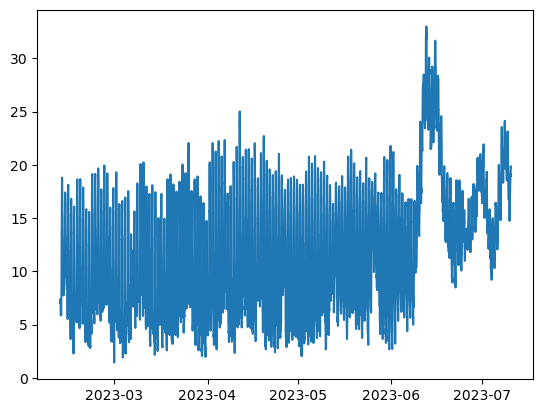

In [33]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_forecast_wind_speed_km_h
plt.plot(x,y)
plt.show()

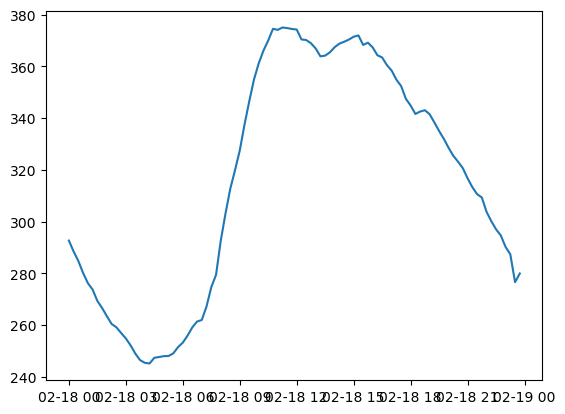

In [34]:
sub = utility_data[(utility_data['ts_month_of_year'] == 2)&
                   (utility_data['ts_day_of_month'] == 18)]
x = sub.event_timestamp
y = sub.load_MW
plt.plot(x,y)
plt.show()

In [35]:
utility_data.columns

Index(['event_timestamp', 'weatherkit_observed_temperature_C',
       'weatherkit_observed_humidity_pc',
       'weatherkit_observed_air_pressure_kPa',
       'weatherkit_observed_cloud_cover_pc',
       'weatherkit_observed_wind_direction_deg',
       'weatherkit_observed_wind_speed_km_h', 'weatherkit_forecast_temp_C',
       'weatherkit_forecast_humidity_pc',
       'weatherkit_forecast_air_pressure_kPa',
       'weatherkit_forecast_cloud_cover_pc',
       'weatherkit_forecast_wind_direction_deg',
       'weatherkit_forecast_wind_speed_km_h', 'load_MW', 'ts_month_of_year',
       'ts_day_of_month', 'ts_day_of_week', 'ts_hour_of_day',
       'ts_minute_of_hour'],
      dtype='object')

In [36]:
observed_vars

['weatherkit_observed_temperature_C',
 'weatherkit_observed_humidity_pc',
 'weatherkit_observed_air_pressure_kPa',
 'weatherkit_observed_cloud_cover_pc',
 'weatherkit_observed_wind_direction_deg',
 'weatherkit_observed_wind_speed_km_h']

In [37]:
forecast_vars

['weatherkit_forecast_temp_C',
 'weatherkit_forecast_humidity_pc',
 'weatherkit_forecast_air_pressure_kPa',
 'weatherkit_forecast_cloud_cover_pc',
 'weatherkit_forecast_wind_direction_deg',
 'weatherkit_forecast_wind_speed_km_h']

In [38]:
ts_vars

['ts_month_of_year',
 'ts_day_of_month',
 'ts_day_of_week',
 'ts_hour_of_day',
 'ts_minute_of_hour']

In [39]:
target_var

'load_MW'

In [40]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from sklearn.model_selection import train_test_split
from src.tde import time_delay_embedding

# create data set with lagged features using time delay embedding
utility_data_ds = []
for col in utility_data.columns:
    if col in observed_vars: 
        col_df = time_delay_embedding(utility_data[col], n_lags=n_lags, horizon=0)
        utility_data_ds.append(col_df.copy())
    elif col in forecast_vars: 
        col_df = time_delay_embedding(utility_data[col], n_lags=n_lags, horizon=horizon)
        utility_data_ds.append(col_df.copy())
    elif col in ts_vars: 
        col_df = utility_data[col]
        utility_data_ds.append(col_df.copy())
    elif col in [target_var]:
        col_df = time_delay_embedding(utility_data[col], n_lags=n_lags, horizon=horizon)
        utility_data_ds.append(col_df.copy())

# concatenating all variables
utility_data_df = pd.concat(utility_data_ds, axis=1).dropna()

In [41]:
utility_data.head()

,event_timestamp,weatherkit_observed_temperature_C,weatherkit_observed_humidity_pc,weatherkit_observed_air_pressure_kPa,weatherkit_observed_cloud_cover_pc,weatherkit_observed_wind_direction_deg,weatherkit_observed_wind_speed_km_h,weatherkit_forecast_temp_C,weatherkit_forecast_humidity_pc,weatherkit_forecast_air_pressure_kPa,weatherkit_forecast_cloud_cover_pc,weatherkit_forecast_wind_direction_deg,weatherkit_forecast_wind_speed_km_h,load_MW,ts_month_of_year,ts_day_of_month,ts_day_of_week,ts_hour_of_day,ts_minute_of_hour
0,2023-02-11 00:30:00+05:30,22.21,70.0,101.357,0.0,359.0,7.19,21.99,72.0,101.369,0.0,1.0,7.06,256.024088,2,11,5,0,30
1,2023-02-11 00:45:00+05:30,22.25,69.0,101.354,0.0,2.0,7.25,21.99,72.0,101.369,0.0,1.0,7.06,251.899132,2,11,5,0,45
2,2023-02-11 01:00:00+05:30,22.10,70.0,101.344,0.0,4.0,7.21,21.99,72.0,101.369,0.0,1.0,7.06,248.695780,2,11,5,1,0
3,2023-02-11 01:15:00+05:30,21.95,70.0,101.333,0.0,6.0,7.15,21.99,72.0,101.369,0.0,1.0,7.06,245.879308,2,11,5,1,15
4,2023-02-11 01:30:00+05:30,21.80,70.0,101.322,0.0,8.0,7.09,21.35,73.0,101.334,0.0,6.0,7.37,243.583376,2,11,5,1,30


In [42]:
utility_data_df.head()

,weatherkit_observed_temperature_C(t-671),weatherkit_observed_temperature_C(t-670),weatherkit_observed_temperature_C(t-669),weatherkit_observed_temperature_C(t-668),weatherkit_observed_temperature_C(t-667),weatherkit_observed_temperature_C(t-666),weatherkit_observed_temperature_C(t-665),weatherkit_observed_temperature_C(t-664),weatherkit_observed_temperature_C(t-663),weatherkit_observed_temperature_C(t-662),...,load_MW(t+92),load_MW(t+93),load_MW(t+94),load_MW(t+95),load_MW(t+96),ts_month_of_year,ts_day_of_month,ts_day_of_week,ts_hour_of_day,ts_minute_of_hour
672,22.21,22.25,22.10,21.95,21.80,21.66,21.53,21.39,21.25,21.05,...,287.322128,276.548840,279.896428,276.836608,274.650796,2,18,5,0,30
673,22.25,22.10,21.95,21.80,21.66,21.53,21.39,21.25,21.05,20.89,...,276.548840,279.896428,276.836608,274.650796,270.507248,2,18,5,0,45
674,22.10,21.95,21.80,21.66,21.53,21.39,21.25,21.05,20.89,20.73,...,279.896428,276.836608,274.650796,270.507248,266.552932,2,18,5,1,0
675,21.95,21.80,21.66,21.53,21.39,21.25,21.05,20.89,20.73,20.59,...,276.836608,274.650796,270.507248,266.552932,264.033180,2,18,5,1,15
676,21.80,21.66,21.53,21.39,21.25,21.05,20.89,20.73,20.59,20.46,...,274.650796,270.507248,266.552932,264.033180,261.876036,2,18,5,1,30


In [43]:
target_variables = utility_data_df.columns.str.contains(f'{target_var}\(t\+')
target_variables = utility_data_df.columns[target_variables]

In [44]:
target_variables.tolist()

['load_MW(t+1)',
 'load_MW(t+2)',
 'load_MW(t+3)',
 'load_MW(t+4)',
 'load_MW(t+5)',
 'load_MW(t+6)',
 'load_MW(t+7)',
 'load_MW(t+8)',
 'load_MW(t+9)',
 'load_MW(t+10)',
 'load_MW(t+11)',
 'load_MW(t+12)',
 'load_MW(t+13)',
 'load_MW(t+14)',
 'load_MW(t+15)',
 'load_MW(t+16)',
 'load_MW(t+17)',
 'load_MW(t+18)',
 'load_MW(t+19)',
 'load_MW(t+20)',
 'load_MW(t+21)',
 'load_MW(t+22)',
 'load_MW(t+23)',
 'load_MW(t+24)',
 'load_MW(t+25)',
 'load_MW(t+26)',
 'load_MW(t+27)',
 'load_MW(t+28)',
 'load_MW(t+29)',
 'load_MW(t+30)',
 'load_MW(t+31)',
 'load_MW(t+32)',
 'load_MW(t+33)',
 'load_MW(t+34)',
 'load_MW(t+35)',
 'load_MW(t+36)',
 'load_MW(t+37)',
 'load_MW(t+38)',
 'load_MW(t+39)',
 'load_MW(t+40)',
 'load_MW(t+41)',
 'load_MW(t+42)',
 'load_MW(t+43)',
 'load_MW(t+44)',
 'load_MW(t+45)',
 'load_MW(t+46)',
 'load_MW(t+47)',
 'load_MW(t+48)',
 'load_MW(t+49)',
 'load_MW(t+50)',
 'load_MW(t+51)',
 'load_MW(t+52)',
 'load_MW(t+53)',
 'load_MW(t+54)',
 'load_MW(t+55)',
 'load_MW(t+56)',
 

In [45]:
predictor_variables = [col for col in utility_data_df.columns if col not in target_variables]
predictor_variables

['weatherkit_observed_temperature_C(t-671)',
 'weatherkit_observed_temperature_C(t-670)',
 'weatherkit_observed_temperature_C(t-669)',
 'weatherkit_observed_temperature_C(t-668)',
 'weatherkit_observed_temperature_C(t-667)',
 'weatherkit_observed_temperature_C(t-666)',
 'weatherkit_observed_temperature_C(t-665)',
 'weatherkit_observed_temperature_C(t-664)',
 'weatherkit_observed_temperature_C(t-663)',
 'weatherkit_observed_temperature_C(t-662)',
 'weatherkit_observed_temperature_C(t-661)',
 'weatherkit_observed_temperature_C(t-660)',
 'weatherkit_observed_temperature_C(t-659)',
 'weatherkit_observed_temperature_C(t-658)',
 'weatherkit_observed_temperature_C(t-657)',
 'weatherkit_observed_temperature_C(t-656)',
 'weatherkit_observed_temperature_C(t-655)',
 'weatherkit_observed_temperature_C(t-654)',
 'weatherkit_observed_temperature_C(t-653)',
 'weatherkit_observed_temperature_C(t-652)',
 'weatherkit_observed_temperature_C(t-651)',
 'weatherkit_observed_temperature_C(t-650)',
 'weatherk

In [46]:
# defining target (Y) and explanatory variables (X)
X = utility_data_df[predictor_variables]
Y = utility_data_df[target_variables]

In [47]:
month_days = X.ts_month_of_year.astype(str)+'-'+X.ts_day_of_month.astype(str)

In [48]:
# train/test split
days_tr,days_ts = train_test_split(month_days.unique(), test_size=.1, shuffle=False)
train_msk = month_days.isin(days_tr)
test_msk = month_days.isin(days_ts)
X_tr, X_ts, Y_tr, Y_ts = X[train_msk],X[test_msk],Y[train_msk],Y[test_msk]

In [49]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.multioutput import MultiOutputRegressor
from lightgbm import LGBMRegressor

# fitting a lgbm model without feature engineering
model_wo_fe = MultiOutputRegressor(LGBMRegressor(),n_jobs=3)
model_wo_fe.fit(X_tr, Y_tr)

MultiOutputRegressor(estimator=LGBMRegressor(), n_jobs=3)

In [50]:
# getting forecasts for the test set
preds_wo_fe = model_wo_fe.predict(X_ts)

# computing the MAPE error
mape(Y_ts, preds_wo_fe)

# 0.06291123244872256


0.06657216181660097

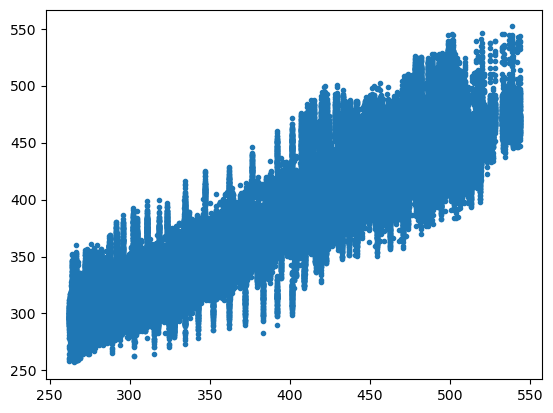

In [51]:
plt.scatter(Y_ts, preds_wo_fe,marker='.')

In [52]:
np.where(Y_ts>1000)

(array([], dtype=int64), array([], dtype=int64))

In [87]:
daily_preds_msk = ((X_ts.ts_hour_of_day == 8) & (X_ts.ts_minute_of_hour ==0))
X_ts_sub = X_ts[daily_preds_msk]

In [89]:
daily_preds_msk.sum()

15

In [90]:
preds_ts_sub = model_wo_fe.predict(X_ts_sub)

In [91]:
preds_ts_sub.reshape(-1)

array([298.39297742, 300.68314355, 311.67539155, ..., 330.21889787,
       340.65423805, 329.2683864 ])

In [94]:
Y_ts[daily_preds_msk].values.reshape(-1)

array([302.000846, 305.076988, 311.163071, ..., 365.206433, 379.605956,
       402.35853 ])

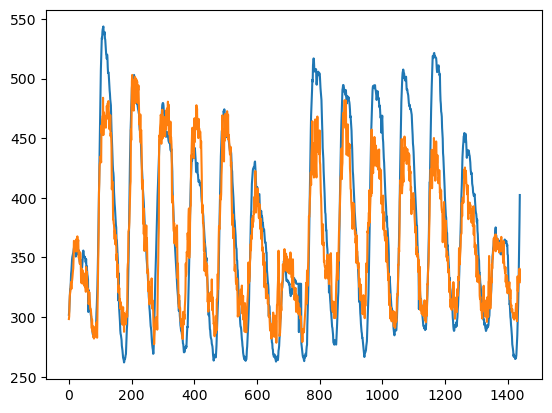

In [95]:
x = np.arange(preds_ts_sub.reshape(-1).shape[0])
y1 = Y_ts[daily_preds_msk].values.reshape(-1)
y2 = preds_ts_sub.reshape(-1)
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [96]:
pd.set_option('display.max_rows', 700)

In [97]:
feature_imp = pd.DataFrame(np.concatenate((np.array(X.columns).reshape(-1,1),
                model_wo_fe.estimators_[0].feature_importances_.reshape(-1,1)),axis=1),columns = ['feature','importance'])
feature_imp = feature_imp[feature_imp['importance']!=0].sort_values(by='importance',ascending=False)
feature_imp.importance=feature_imp.importance/feature_imp.importance.sum()

In [98]:
feature_imp.head(100)

,feature,importance
9311,load_MW(t),0.185333
7148,weatherkit_forecast_wind_direction_deg(t-627),0.026333
9140,load_MW(t-171),0.022
9315,ts_hour_of_day,0.018667
2768,weatherkit_observed_wind_direction_deg(t-591),0.018667
7152,weatherkit_forecast_wind_direction_deg(t-623),0.017
9310,load_MW(t-1),0.014
9237,load_MW(t-74),0.013333
7259,weatherkit_forecast_wind_direction_deg(t-516),0.013333
9316,ts_minute_of_hour,0.011


In [99]:
X.columns.shape

(9317,)

In [100]:
all_imp = np.array([model_wo_fe.estimators_[i].feature_importances_ for i in range(len(model_wo_fe.estimators_))])

feature_imp = pd.DataFrame(np.concatenate((np.array(X.columns).reshape(-1,1),
                           all_imp.sum(axis=0).reshape(-1,1)),axis=1),
                           columns = ['feature','importance'])
feature_imp = feature_imp.sort_values(by='importance',ascending=False)

In [101]:
feature_imp.importance=feature_imp.importance/feature_imp.importance.sum()

In [102]:
feature_imp['cum_imp']=feature_imp.importance.cumsum()

In [103]:
feature_imp.head(15033)

,feature,importance,cum_imp
9314,ts_day_of_week,0.02525,0.02525
9311,load_MW(t),0.017399,0.042649
9313,ts_day_of_month,0.017031,0.059681
9315,ts_hour_of_day,0.004872,0.064552
9310,load_MW(t-1),0.002156,0.066708
...,...,...,...
1553,weatherkit_observed_air_pressure_kPa(t-462),0.000003,0.999986
5290,weatherkit_forecast_humidity_pc(t-181),0.000003,0.99999
1551,weatherkit_observed_air_pressure_kPa(t-464),0.000003,0.999993
1549,weatherkit_observed_air_pressure_kPa(t-466),0.000003,0.999997


In [104]:
feature_imp.cum_imp.astype(float).describe(percentiles=[0.25,.5,.75,.8,.90,.95])

count    9317.000000
mean        0.734859
std         0.222501
min         0.025250
25%         0.584514
50%         0.790486
75%         0.925472
80%         0.945749
90%         0.979412
95%         0.992033
max         1.000000
Name: cum_imp, dtype: float64

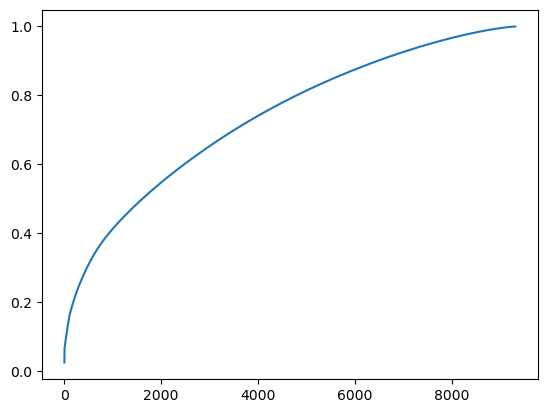

In [105]:
x = np.arange(feature_imp.shape[0])
y = feature_imp.cum_imp.astype(float)
plt.plot(x,y)
plt.show()

In [106]:
# 15033 out of 17765 features accounted for 98% of feature importance
# count    17765.000000
# mean         0.747985
# std          0.235062
# min          0.030375
# 25%          0.591424
# 50%          0.820361
# 75%          0.950812
# 80%          0.968600
# 90%          0.991921
# 95%          0.998089
# max          1.000000
# Name: cum_imp, dtype: float64

In [107]:
feature_imp.shape

(9317, 3)